In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Monte-Carlo estimation

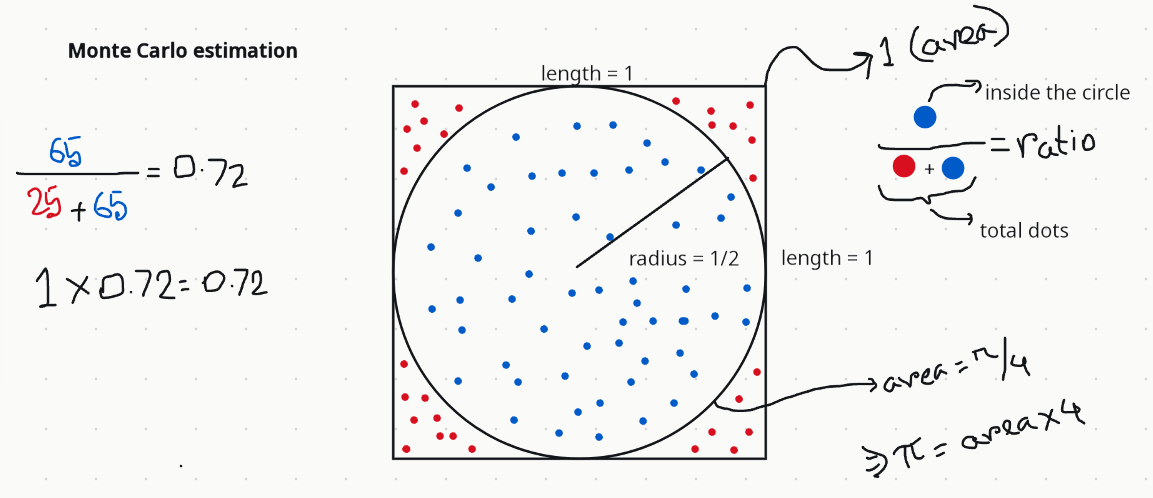

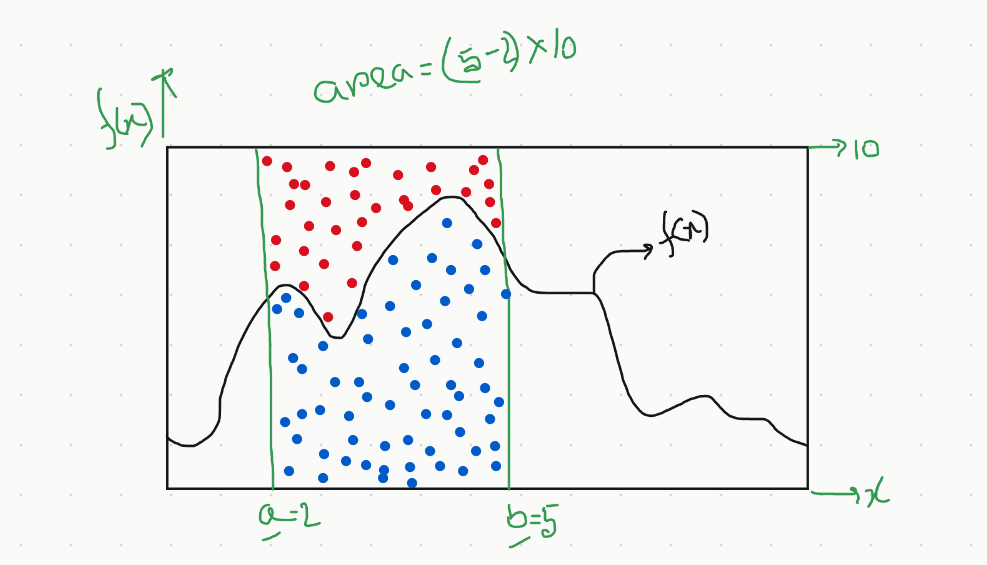

In [9]:
import random
from scipy.constants import pi

throw = 1000000

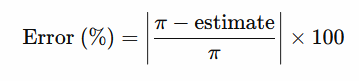

**for loop, random numbers**

In [10]:
count = 0 # initiate count variable

for i in range(throw):
    x, y = random.random(), random.random()
    if x**2 + y**2 < 1:     
        count += 1 # increases count if the dot is inside the circle

# estimated_pi = 4*total_area*ratio
estimated_pi = 4.0*count/throw
print("Result (using random.random, for):\t", estimated_pi, 
      "\t rel. error (in %):\t", np.abs((pi - estimated_pi)/pi)*100) #error calculation

Result (using random.random, for):	 3.141232 	 rel. error (in %):	 0.011479960311881459


**for loop, uniform random number**

In [13]:
count = 0

for i in range(throw):
    x, y = random.uniform(0.0,1.0), random.uniform(0.0,1.0)
    if x**2 + y**2 < 1:     
        count += 1
    
print("Result (using random.uniform, for):\t",4.0*count/throw,
      "\t rel. error (in %):\t", np.abs((pi - 4.0*count/throw)/pi)*100)

Result (using random.uniform, for):	 3.141992 	 rel. error (in %):	 0.012711591038089623


**while loop, uniform random number**

In [14]:
count = 0
numberOfPointsC = throw # starts from a huge number

while numberOfPointsC > 0:
    x, y = random.uniform(0.0,1.0), random.uniform(0.0,1.0)
    if x**2 + y**2 < 1:     
        count += 1
        numberOfPointsC -= 1 #decreases this variable in every iteration
    else:
        numberOfPointsC -= 1
    
print("Result (using random.uniform, while):\t",4.0*count/throw,
      "\t rel. error (in %):\t", np.abs((pi - 4.0*count/throw)/pi)*100)

Result (using random.uniform, while):	 3.141496 	 rel. error (in %):	 0.0030765793166280487


# other function test

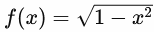

Number of points above the curve:					 3171
Number of points below the curve:					 11829
Fraction: Number of points below the curve/Total number of points:	 0.7886
Rectangle area:								 1.0
Area under the function:						 0.7886


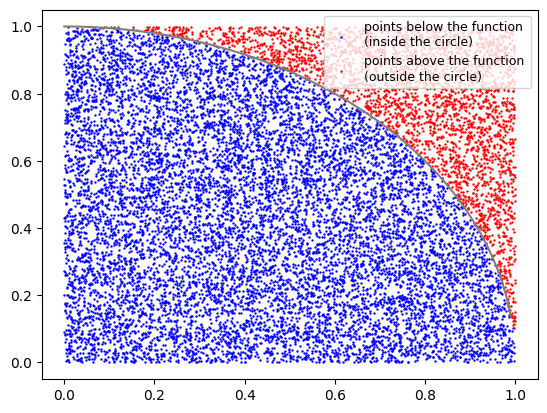

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# defines the func
def f(x):
    return np.sqrt(1-x**2)



numberOfPoints = 15000
# integration limit
x0 = 0.0
x1 = 1.0

# line between in and out (below/above) i.e. solid line plot
x_f = np.arange(x0, x1, 0.01)
y_f = f(x_f)
plt.plot(x_f, y_f, color = "gray")
fmax = max(f(x_f))


# generates the random dots we are throwing into
x = np.random.uniform(x0,x1,numberOfPoints)
y = np.random.uniform(0.0,fmax,numberOfPoints)



below = plt.scatter(x[np.where(y < f(x))], y[np.where(y < f(x))], color = "blue",s=0.5) #dots are inside the curve
above = plt.scatter(x[np.where(y >= f(x))], y[np.where(y >= f(x))], color = "red",s=0.5)

plt.legend((below, above),
           ('points below the function \n(inside the circle)', 'points above the function\n(outside the circle)'),
           loc='best',
           fontsize=9)

print("Number of points above the curve:\t\t\t\t\t", len(np.where(y >= f(x))[0]))
print("Number of points below the curve:\t\t\t\t\t", len(np.where(y < f(x))[0]))
print("Fraction: Number of points below the curve/Total number of points:\t", len(np.where(y < f(x))[0])/numberOfPoints)
print("Rectangle area:\t\t\t\t\t\t\t\t", fmax*(x1-x0))
print("Area under the function:\t\t\t\t\t\t", fmax*(x1-x0)*len(np.where(y < f(x))[0])/numberOfPoints)

# another func

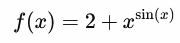

Number of points above the curve:					 1022
Number of points below the curve:					 478
Fraction: Number of points below the curve/Total number of points:	 0.31866666666666665
Rectangle area:								 226.1030899011044
Area under the function:						 72.0515179818186


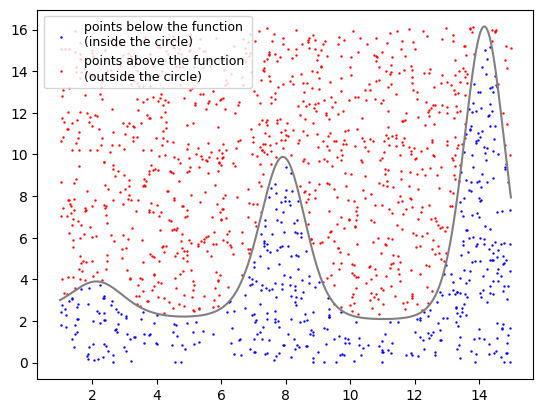

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# defines the func
def f(x):
    return 2+x**np.sin(x)



numberOfPoints = 1500
# integration limit
x0 = 1.0
x1 = 15.0

# line between in and out (below/above) i.e. solid line plot
x_f = np.arange(x0, x1, 0.01)
y_f = f(x_f)
plt.plot(x_f, y_f, color = "gray")
fmax = max(f(x_f))


# generates the random dots we are throwing into
x = np.random.uniform(x0,x1,numberOfPoints)
y = np.random.uniform(0.0,fmax,numberOfPoints)



below = plt.scatter(x[np.where(y < f(x))], y[np.where(y < f(x))], color = "blue",s=0.5) #dots are inside the curve
above = plt.scatter(x[np.where(y >= f(x))], y[np.where(y >= f(x))], color = "red",s=0.5)

plt.legend((below, above),
           ('points below the function \n(inside the circle)', 'points above the function\n(outside the circle)'),
           loc='best',
           fontsize=9)

print("Number of points above the curve:\t\t\t\t\t", len(np.where(y >= f(x))[0]))
print("Number of points below the curve:\t\t\t\t\t", len(np.where(y < f(x))[0]))
print("Fraction: Number of points below the curve/Total number of points:\t", len(np.where(y < f(x))[0])/numberOfPoints)
print("Rectangle area:\t\t\t\t\t\t\t\t", fmax*(x1-x0))
print("Area under the function:\t\t\t\t\t\t", fmax*(x1-x0)*len(np.where(y < f(x))[0])/numberOfPoints)

# Monte-Carlo Int. Technique

**A very interesting video**

**https://www.youtube.com/watch?v=WAf0rqwAvgg**

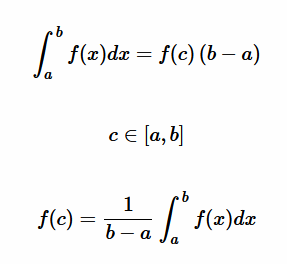

In [20]:
# interval
x0 = 0
x1 = 5

def f(x):
    return x**3

numberOfPoints = 150000


X = np.random.uniform(x0,x1,numberOfPoints)
F = [f(x) for x in X] # for loop equivalent
result = (x1-x0)*np.mean(F)
print(result)

156.28524688839664


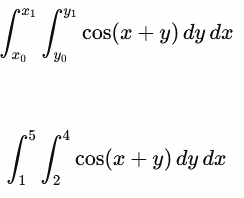

In [21]:
x0 = 1
x1 = 5

y0 = 2
y1 = 4

def f(x,y):
    return np.cos(x+y)

numberOfPoints = 15000

X = np.random.uniform(x0,x1,numberOfPoints)
Y = np.random.uniform(y0,y1,numberOfPoints)

result = (x1-x0)*(y1-y0)*np.mean(f(X,Y))
print(result)

2.9406074981829207
